### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-14/12/19
#### Clasificacion de RWE-DWT de MI-EEG con CNN-1D + GRU
##### 10 ejecuciones independientes para obtener la media y desviacion estandar
##### Se agrego la transpuesta

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, GRU, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 22, 3))
x_test = x_test.reshape((n_samples_test, 1, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 1, 22, 3)
(288, 1, 22, 3)


In [0]:
x_train = np.transpose(x_train, (0,1,3,2))
x_test = np.transpose(x_test, (0,1,3,2))

print(x_train.shape)
print(x_test.shape)

(288, 1, 3, 22)
(288, 1, 3, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 97us/sample - loss: 2.2656 - acc: 0.4201
kappa:  0.22685185185185186
confusion matrix:
 [[21 22 14 15]
 [10 21 17 24]
 [ 8 10 29 25]
 [12  3  7 50]]
(0.4145492545014864, 0.4201388888888889, 0.4061222525716641, None)


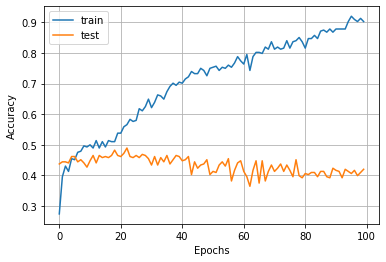

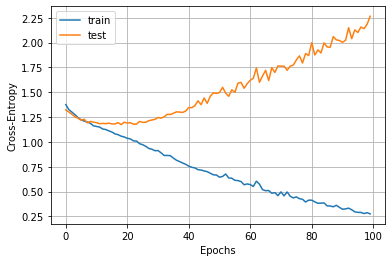

Iteration: 2
288/288 [==============================] - 0s 82us/sample - loss: 2.2667 - acc: 0.3854
kappa:  0.18055555555555558
confusion matrix:
 [[23 20 16 13]
 [ 9 32 22  9]
 [ 8 18 37  9]
 [10  8 35 19]]
(0.3966550116550117, 0.38541666666666663, 0.3804461658560019, None)


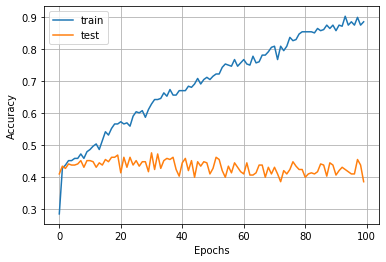

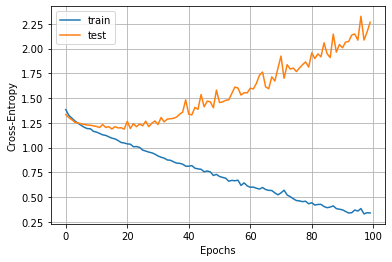

Iteration: 3
288/288 [==============================] - 0s 87us/sample - loss: 2.1510 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[29 26 11  6]
 [ 5 32 19 16]
 [10 15 36 11]
 [10 11 18 33]]
(0.46164021164021163, 0.4513888888888889, 0.4525933004193874, None)


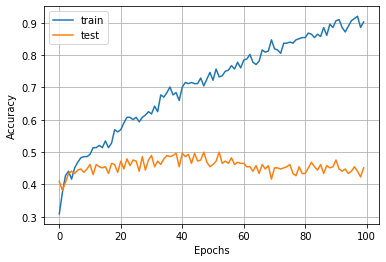

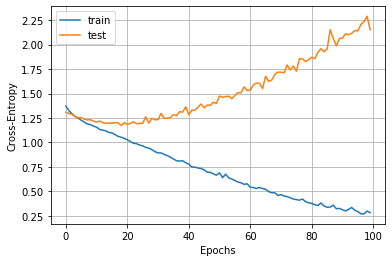

Iteration: 4
288/288 [==============================] - 0s 84us/sample - loss: 2.0713 - acc: 0.4444
kappa:  0.2592592592592593
confusion matrix:
 [[29 21 10 12]
 [ 7 27 19 19]
 [ 8 13 29 22]
 [10 10  9 43]]
(0.4495178036850178, 0.4444444444444444, 0.4417776967237399, None)


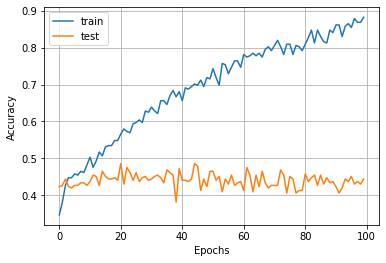

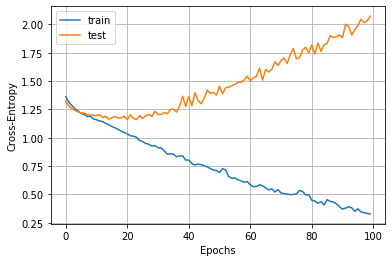

Iteration: 5
288/288 [==============================] - 0s 85us/sample - loss: 2.4153 - acc: 0.4306
kappa:  0.2407407407407407
confusion matrix:
 [[25 22 11 14]
 [ 9 29 15 19]
 [11 14 31 16]
 [14  8 11 39]]
(0.43001331466372983, 0.4305555555555556, 0.42800913304252997, None)


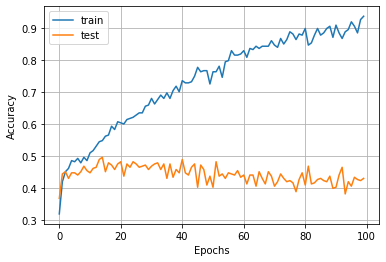

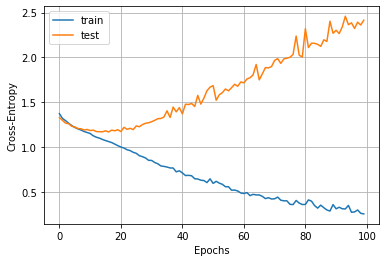

Iteration: 6
288/288 [==============================] - 0s 85us/sample - loss: 2.1245 - acc: 0.4306
kappa:  0.2407407407407407
confusion matrix:
 [[26 30  8  8]
 [ 4 32 26 10]
 [ 5 15 42 10]
 [10  8 30 24]]
(0.45300331066146826, 0.4305555555555555, 0.42777366077486356, None)


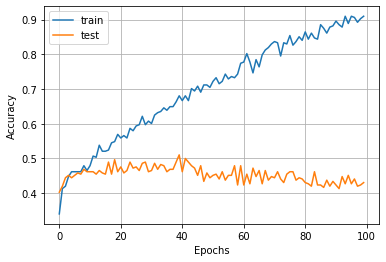

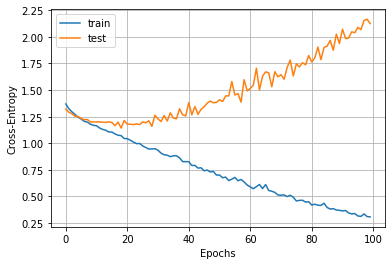

Iteration: 7
288/288 [==============================] - 0s 89us/sample - loss: 2.4387 - acc: 0.4583
kappa:  0.2777777777777778
confusion matrix:
 [[26 26 11  9]
 [ 6 31 21 14]
 [11 15 34 12]
 [10  6 15 41]]
(0.46180717645050645, 0.4583333333333333, 0.456957957957958, None)


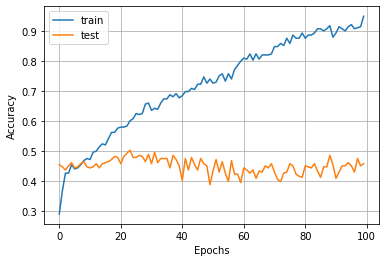

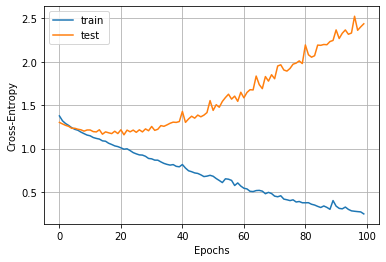

Iteration: 8
288/288 [==============================] - 0s 89us/sample - loss: 2.0725 - acc: 0.4271
kappa:  0.23611111111111116
confusion matrix:
 [[26 31  7  8]
 [ 9 27 22 14]
 [ 8 14 32 18]
 [ 9 11 14 38]]
(0.4347868396663578, 0.42708333333333337, 0.4274456879526004, None)


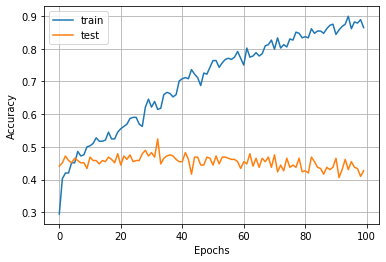

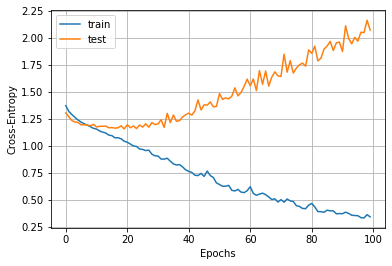

Iteration: 9
288/288 [==============================] - 0s 83us/sample - loss: 2.2075 - acc: 0.4549
kappa:  0.27314814814814814
confusion matrix:
 [[23 25 10 14]
 [ 8 30 17 17]
 [ 8 13 35 16]
 [12  8  9 43]]
(0.45411318962969427, 0.45486111111111116, 0.4499409580710394, None)


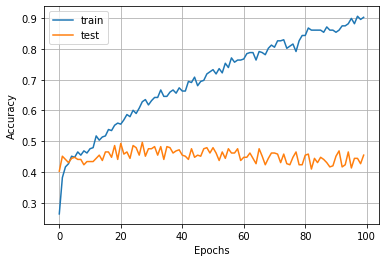

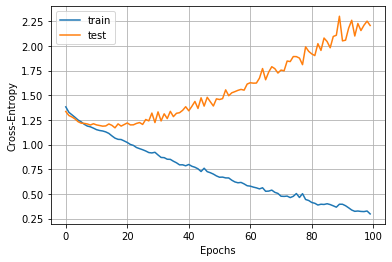

Iteration: 10
288/288 [==============================] - 0s 85us/sample - loss: 2.0832 - acc: 0.4479
kappa:  0.26388888888888884
confusion matrix:
 [[30 19  8 15]
 [ 5 29 10 28]
 [ 9 14 25 24]
 [11  9  7 45]]
(0.46392274099140296, 0.44791666666666663, 0.44425046270816865, None)


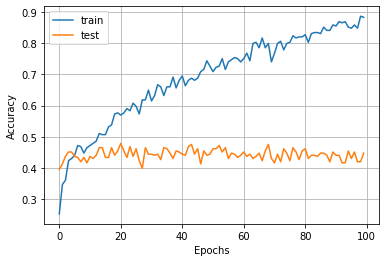

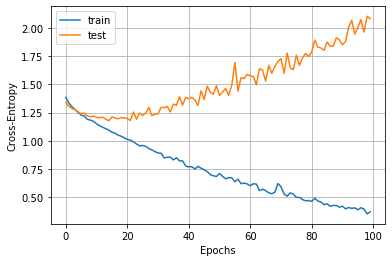


Resultados:
loss: [2.265617158677843, 2.266748587290446, 2.151024685965644, 2.0713358985053167, 2.4153478542963662, 2.124507745107015, 2.4386896159913807, 2.0725082688861423, 2.2074606153700085, 2.0831595526801214]
accuracy: [0.4201389, 0.38541666, 0.4513889, 0.44444445, 0.43055555, 0.43055555, 0.45833334, 0.42708334, 0.4548611, 0.44791666]
kappa: [0.22685185185185186, 0.18055555555555558, 0.2685185185185185, 0.2592592592592593, 0.2407407407407407, 0.2407407407407407, 0.2777777777777778, 0.23611111111111116, 0.27314814814814814, 0.26388888888888884]
precision: [0.4145492545014864, 0.3966550116550117, 0.46164021164021163, 0.4495178036850178, 0.43001331466372983, 0.45300331066146826, 0.46180717645050645, 0.4347868396663578, 0.45411318962969427, 0.46392274099140296]
recall: [0.4201388888888889, 0.38541666666666663, 0.4513888888888889, 0.4444444444444444, 0.4305555555555556, 0.4305555555555555, 0.4583333333333333, 0.42708333333333337, 0.45486111111111116, 0.44791666666666663]
f1: [0.40612

In [0]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(TimeDistributed(Conv1D(32, 3, activation='relu'), input_shape=(None,3,22)))
    model.add(TimeDistributed(Flatten()))
    model.add(GRU(128))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_18 (TimeDis (None, None, 1, 32)       2144      
_________________________________________________________________
time_distributed_19 (TimeDis (None, None, 32)          0         
_________________________________________________________________
gru_9 (GRU)                  (None, 128)               61824     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 64,484
Trainable params: 64,484
Non-trainable params: 0
_________________________________________________________________


In [0]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4351
std: (+/- 0.0206)
kappa: 0.2468
std: 0.0275
precision: 0.4420
recall: 0.4351
f1: 0.4315
